<a href="https://colab.research.google.com/github/Huebr/BuscaLinear/blob/master/implementacao_metodos_de_busca_linear_on_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installation cell
%%shell
if ! command -v julia 3>&1 > /dev/null
then
    wget 'https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz' \
        -O /tmp/julia.tar.gz
    tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
    rm /tmp/julia.tar.gz
fi
julia -e 'using Pkg; pkg"add IJulia; precompile;"'
echo 'Done'

--2020-09-11 12:11:44--  https://julialang-s3.julialang.org/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz
Resolving julialang-s3.julialang.org (julialang-s3.julialang.org)... 151.101.2.49, 151.101.66.49, 151.101.130.49, ...
Connecting to julialang-s3.julialang.org (julialang-s3.julialang.org)|151.101.2.49|:443... connected.
HTTP request sent, awaiting response... 302 gce internal redirect trigger
Location: https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz [following]
--2020-09-11 12:11:44--  https://storage.googleapis.com/julialang2/bin/linux/x64/1.4/julia-1.4.2-linux-x86_64.tar.gz
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.128, 173.194.79.128, 108.177.119.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99093958 (95M) [application/x-tar]
Saving to: ‘/tmp/julia.tar.gz’

/tmp/julia.tar.gz   100%[========

In [ ]:
#Julia 1.4 Environment
using Pkg
pkg"add ForwardDiff; precompile;"
pkg"add Plots; precompile;"
pkg"add PyPlot; precompile;"

  Resolving package versions...
  Installed DiffResults ────────────────── v1.0.2
  Installed ForwardDiff ────────────────── v0.10.12
  Installed DiffRules ──────────────────── v1.0.1
  Installed CommonSubexpressions ───────── v0.3.0
  Installed CompilerSupportLibraries_jll ─ v0.3.3+0
  Installed OpenSpecFun_jll ────────────── v0.5.3+3
  Installed SpecialFunctions ───────────── v0.10.3
######################################################################### 100.0%
######################################################################### 100.0%
   Updating `~/.julia/environments/v1.4/Project.toml`
  [f6369f11] + ForwardDiff v0.10.12
   Updating `~/.julia/environments/v1.4/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [e66e0078] + CompilerSupportLibraries_jll v0.3.3+0
  [163ba53b] + DiffResults v1.0.2
  [b552c78f] + DiffRules v1.0.1
  [f6369f11] + ForwardDiff v0.10.12
  [77ba4419] + NaNMath v0.3.4
  [efe28fd5] + OpenSpecFun_jll v0.5.3+3
  [276daf66] + SpecialFunctions v0.1

<h1>Método Principal</h1>

In [ ]:
#função de busca linear
function linear_search(f::Function,x::Vector,d::Vector,method::Function)
    ϕ = t->f(x+t*d)
    α = method(f,x,d)
    return (ϕ(α),x+α*d)
end

linear_search (generic function with 1 method)

<h1>Funções Auxiliares</h1>

In [ ]:
import ForwardDiff  # calcula derivadas usando automatic differentiation in forward mode
using LinearAlgebra #adiciona operações de algebra linear
using Plots

pyplot()#usa PyPlot como backend engine
∇ = (h,x)->ForwardDiff.gradient(h,x) #gradiente de h(x)
Hessian = (h,x)->ForwardDiff.hessian(h,x) # hessian de h(x)
Df = (h,x)->ForwardDiff.derivative(h,x);  # primeira derivada de h'(x)
D_2f = (h,x)->ForwardDiff.derivative(z->ForwardDiff.derivative(h,z),x) # segunda derivada h"(x)

#55 (generic function with 1 method)

<h1>Método da Seção Áurea</h1>

In [ ]:
function secao_aurea(f::Function,x::Vector,d::Vector;φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção intervalo
    a=0
    b=2*ρ
    s = b / 2
    while(φ(b)<φ(s))
        a = s
        s = b
        b *= 2
    end
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    iter=0
    while(b - a > ϵ)
        if(φ(u)<φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end

function secao_aurea(f::Function,x::Vector,d::Vector,(a,b)::Tuple{Float64,Float64};φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)::Float64
    θ_1 = (3 - sqrt(5))/2.0
    θ_2 = (sqrt(5) - 1)/2.0
    #Obtenção de t
    u = a + θ_1*(b - a)
    v = a + θ_2*(b - a)
    while(b - a > ϵ)
        if(φ(u)< φ(v))
            b = v
            v = u
            u = a + θ_1*(b - a)
        else
            a = u
            u = v
            v = a + θ_2*(b - a)
        end
    end
    return (u+v)/2
end

secao_aurea (generic function with 2 methods)

In [ ]:
#exemplo 4.5 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],secao_aurea)

(0.36363636363636365, [2.363636358633485, 0.45454545287782844])

<h1>Método de Newton</h1>

In [ ]:
function newton(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64=0.25,ϵ = 1e-9,n_iter=10000)::Float64
   iter = 0
   while (abs(Df(φ,t)) > ϵ && iter < n_iter)
         t = t - (Df(φ,t)/D_2f(φ,t))
         iter = iter + 1
   end 
   return t
end

newton (generic function with 1 method)

In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],newton)

(0.36363636363636365, [2.3636363636363638, 0.4545454545454546])

<h1> Método de Armijo </h1>

In [ ]:
function armijo(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64= 1.0,η::Float64 = 0.25)
    # f(x + td) > f(x) +t(∇f(x)⋅ d)
    while (φ(t)>φ(0)+ η*t*(∇(f,x)⋅d))
      t *=0.8
    end
    return t
end

armijo (generic function with 1 method)

In [ ]:
#exemplo 4.10 livro
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],armijo)

(0.5528000000000003, [2.9200000000000004, 0.6400000000000001])

# Modo de Usar

   Sejam os dados de entrada $x \in \mathcal{R}^n,d \in \mathcal{R}^n,f: \mathcal{R}^n \to \mathcal{R}$. Onde $x$ representa as variáveis de decisão, $f$ a função objetivo e $d$ um vetor direção de descida. Vamos mostrar como chamar os métodos de busca linear para resolver o problema de encontrar um tamanho de passo $\alpha$ tal que $f(x + \alpha d) < f(x)$.Para tanto, iremos utilizar a função chamadora linear_search(). Nessa inserimos os dados de entrada em conjunto com a função para um método de busca linear.


   Considere o seguinte exemplo, seja $f(x_1,x_2)= \frac{1}{2}(x_1 - 2)^2 + (x_2 - 1)^2$, $x = \begin{pmatrix}1 \\0\end{pmatrix}$ e $d  = \begin{pmatrix}3 \\1\end{pmatrix}$. Esses podem ser passados para linear_search da seguinte forma:
 




In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],secao_aurea)

(0.36363636363636365, [2.363636358633485, 0.45454545287782844])



   Onde o primeiro campo da função implementa uma função anônima para representar $f(x)$, com formato <i>(vetores)$\to$ (função expressa)</i>. Devemos utilizar de operações aritméticas padrões sobre um vetor[$i$], que refere-se a coordenada $i$ do vetor(em julia começa de 1 até n), para expressar $f(x)$. Os dois campos seguidos de linear_search fazem referência aos $x,d$ implementados com Array's([$x_1$,$x_2$] e [$d_1$,$d_2$]). 

  No último campo temos uma função referenciando o método(no caso seção aurea) usado, temos três referências implementadas secao_aurea, armijo e newton. Elas podem ser chamados da mesma forma do exemplo anterior, que utiliza parâmetros definidos pelo livro-texto da disciplina, ou podemos utilizar funções anonimas para chamar um método customizado da forma <i>$(f,x,d)->$method($f$,$x$,$d$,parametros_adicionais)</i>. Veja o exemplo customizado:







In [ ]:
linear_search(x->0.5*(x[1]-2)^2 + (x[2] - 1)^2 ,[1,0],[3,1],(f,x,d)->armijo(f,x,d,t=0.7,η = 0.5))

(0.363872, [2.344, 0.44799999999999995])

 Na proxima seção discutimos os parâmetros para cada método. A saída do método linear_search retorna uma tupla da forma ($f(x+αd),x+αd$), ou seja, o valor da função objetivo no melhor ponto encontrado e o ponto.

# Parâmetros dos Métodos

   Aqui colocaremos as funções de métodos de busca linear implementado e a descrição sobre seus parâmetros. Parametros depois do caracter ";" são chamados de argumentos palavra-chave. Esses devem vir depois dos argumentos posicionais e da forma (palavra-chave) = valor. Algumas palavras-chave estão em unicode para acessar estas no julia basta escrever da mesma forma que em latex(ex. \epsilon) e pressionar a tecla 'tab', ou seja , $\epsilon$ = \epsilona + tab.


secao_aurea(f::Function, x::Vector, d::Vector; φ::Function = t->f(x+t*d), ρ = 1/2, ϵ = 1e-9)
>  Algoritmo de busca unidimensional exata usando seção aurea para fazer um busca dentro de um intervalo unimodal. Implementa automaticamente um método para tentar encontrar um intervalo unimodal inicial. Caso este não for unimodal não a garantia se o método é exato.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  ρ(\rho) - valor utilizado para estimar o intervalo inicial (0,2ρ).
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Quanto maior mais rapido converge porém com menor precisão. 


---

secao_aurea(f::Function,x::Vector,d::Vector,(a,b)::Tuple{Float64,Float64}; φ::Function = t->f(x+t*d),ρ = 1/2,ϵ = 1e-9)
> Algoritmo de busca unidimensional exata usando seção aurea para fazer um busca dentro de um intervalo unimodal. Possui como parâmetro inicial uma tupla com o intervalo inicial($a <  b$). Caso este não for unimodal não a garantia se o método é exato.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  ρ(\rho) - valor utilizado para estimar o intervalo inicial (0,2ρ).
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Quanto maior mais rapido converge porém com menor precisão. 

---
newton(f::Function, x::Vector, d::Vector; φ::Function = y->f(x+y*d), t::Float64=0.25, ϵ = 1e-9, n_iter=10000)::Float64

> Algoritmo de busca unidimensional usando método de newton para fazer um busca a partir de um tamanho de passo inicial t. Caso este não esteja perto o suficiente do ótimo não a garantia se o método converge.
*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  t - passo inicial usado.
*  ϵ(\epsilon) -  tolerância utilizada para verificar convergencia. Quanto maior mais rapido converge porém com menor precisão. 
* n_iter - número máximo de iterações que o método pode executar.

---
armijo(f::Function,x::Vector,d::Vector;φ::Function = y->f(x+y*d),t::Float64= 1.0,η::Float64 = 0.25)
> Algoritmo de busca unidimensional usando condição de armijo para fazer um busca a partir de um tamanho de passo inicial t. Não garanti proximidade a um minimizador global, porém converge rapidamente.

*  φ(\varphi) - função unidimensional definida sobre $f(x)$ que queremos otimizar.
*  t - tamanho de passo inicial usado.
*  η(\eta) -  fator de redução usado.
---






Todos os métodos retornam um tamanho de passo como um ponto flutuante.

<h1>Testes</h1>

<h3>primeiro dados de teste</h3>

In [ ]:
f1 = x-> (x[1]-2)^4 + (x[1] - 2*x[2])^2
x0 = [0,3]
d0 = -∇(f1,x0)

2-element Array{Int64,1}:
  44
 -24

Método de busca exata seção áurea

In [ ]:
linear_search(f1,x0,d0,secao_aurea)

(0.3653851152608548, [2.707533345633471, 1.5231636296544704])

Método de Newton

In [ ]:
linear_search(f1,x0,d0,newton)

(0.3653851152608547, [2.7075333493476896, 1.523163627628533])

Método de armijo

In [ ]:
linear_search(f1,x0,d0,armijo)

(1.2018466871483395, [3.023656976384002, 1.350732558335999])

<h3>segundo dados de teste</h3>

In [ ]:
f2 = x-> 100*(x[2]-(x[1])^2)^2 + (1 - x[1])^2
x0 = [-1.9,2]
d0 = -∇(f2,x0)

2-element Array{Float64,1}:
 1229.3999999999999
  322.0

Método de busca exata seção áurea

In [ ]:
linear_search(f2,x0,d0,secao_aurea)

(0.5132451974405922, [1.7160553132339524, 2.9471041246635212])

Método de Newton

In [ ]:
linear_search(f2,x0,d0,newton)

(0.5132451974225749, [1.7160551793785697, 2.9471040896046032])

Método de armijo

In [ ]:
linear_search(f2,x0,d0,armijo)

(33.64676218894833, [-1.2766201408317648, 2.1632733973093963])

<h3>terceiro dados de teste</h3>

In [ ]:
f3 = x-> 1.5 - x[1]*(1-x[2])^2 + (2.25 - x[1]*(1-(x[2])^2))^2 +(2.625 - x[1]*(1-x[2]^3))^2
x0 = [0,0]
d0 = -∇(f3,x0)

2-element Array{Float64,1}:
 10.75
 -0.0

Método de busca exata seção áurea

In [ ]:
linear_search(f3,x0,d0,secao_aurea)

(-0.9921875, [2.687500003177064, 0.0])

Método de Newton

In [ ]:
linear_search(f3,x0,d0,newton)

(-0.9921875, [2.6875, 0.0])

Método de armijo

In [ ]:
linear_search(f3,x0,d0,armijo)

(0.40246290720000555, [3.5225600000000017, 0.0])

<h3>quarto dados de teste</h3>

In [ ]:
f4 = x-> (x[1] - 2*x[2]+5*x[2]^2 - x[2]^3 -13)^2 + (x[1] - 14*x[2] + x[2]^2 + x[2]^3 -29)^2
x0 = [15,-2]
d0 = -∇(f4,x0)

2-element Array{Int64,1}:
  -88
 2432

Método de busca exata seção áurea

In [ ]:
linear_search(f4,x0,d0,secao_aurea)

(54.449342510155596, [14.952295930264228, -0.6816329818477422])

Método de Newton

In [ ]:
println(linear_search(f4,x0,d0,newton))
print(linear_search(f4,x0,d0,(f,x,d)->newton(f,x,d,t = 0.0001)))

(136.12522866780478, [14.789735317977993, 3.8109512122445723])
(54.44934251014155, [14.952295937106829, -0.6816331709523435])

Método de armijo

In [ ]:
linear_search(f4,x0,d0,armijo)

(72.65870189464304, [14.944223373589958, -0.45853687012247035])

<h3>quinto dados de teste</h3>

In [ ]:
f5 = x-> 100*(x[3] - ((x[1]+x[2])/2)^2)^2 + (1-x[1])^2 + (1-x[2])^2
x0 = [-1.2,2,0]
d0 = -∇(f5,x0)

3-element Array{Float64,1}:
  -8.400000000000002
 -14.800000000000002
  32.00000000000001

Método de busca exata seção áurea

In [ ]:
linear_search(f5,x0,d0,secao_aurea)

(34.579084112692456, [-3.7391888342040716, -2.473808898359554, 9.673100320777413])

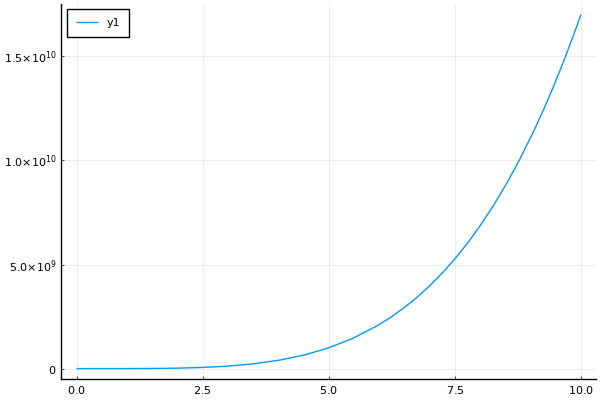

In [ ]:
plot(h->f5(x0+h*d0),0,10)

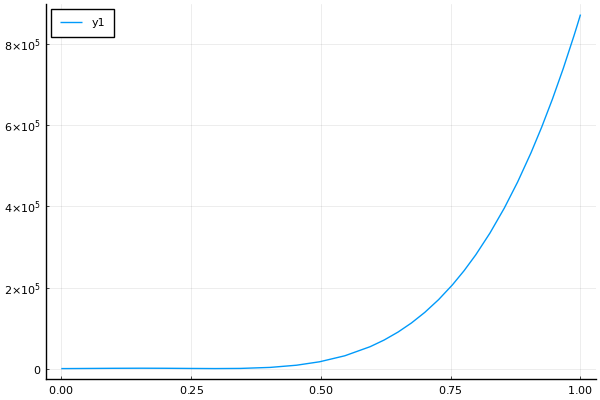

In [ ]:
plot(h->f5(x0+h*d0),0,1)

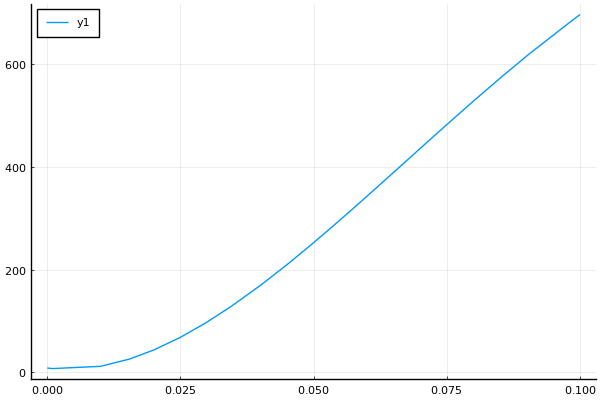

In [ ]:
plot(h->f5(x0+h*d0),0,0.1)

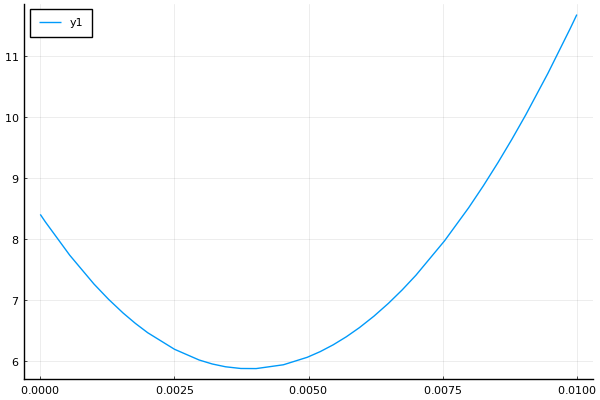

In [ ]:
plot(h->f5(x0+h*d0),0,0.01)

In [ ]:
linear_search(f5,x0,d0,(f,x,d)->secao_aurea(f,x,d,(0.0,1e-2)))

(5.8732180672986045, [-1.2327306570882732, 1.9423316994158994, 0.12468821747913622])

Método de Newton



In [ ]:
linear_search(f5,x0,d0,newton)

(34.579084112692456, [-3.7391888351214044, -2.4738088999758068, 9.673100324272015])

In [ ]:
linear_search(f5,x0,d0,(f,x,d)->newton(f,x,d,t=0.01))

(5.8732180672986045, [-1.232730656798366, 1.9423316999266886, 0.12468821637472749])

Método de armijo

In [ ]:
linear_search(f5,x0,d0,armijo)

(5.983221692235954, [-1.239667878456105, 1.930108976053529, 0.15111572745182889])